#PROJECT-1 (TWITTER SENTIMENT ANALYSIS)

#Reading the Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/twitter_new.csv',names=['target','ids','date','flag','user','text'],header = None ,encoding = "ISO-8859-1")
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


#Checking the data is Balanced or not

In [ ]:
df['target'].unique()

array([0, 4])

In [ ]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

##Removing unnecessary symbols,punctuations etc
##Stemming,Removing Stopwords
##Data Cleaning 

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: preprocess(x))

##Tokenization
##Converting words into Vectors by using CountVectorizer and TF-IDF techniques

In [ ]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = TfidfVectorizer(stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'])

##Spliting the data into Training and Testing

In [ ]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['target'], test_size=0.25, random_state=5)

##Model Training

In [ ]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

##Calculating Accuracy

In [ ]:
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.7722875


##Creating Confustion matrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, Y_test)

array([[155877,  47066],
       [ 44019, 153038]])

#PROJECT-3 (INSTAGRAM INFLUENCERS)

In [1]:
import pandas as pd
df = pd.read_csv('/content/Influencer.xlsx - Influencer.csv')
df.head(10)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
6,7,\nkimkardashian,91,330.7m,3.5m,5.7k,0.005,1.7m,19.8b,United States
7,8,\nbeyonce,92,276.1m,3.6m,2.0k,0.008,2.2m,7.3b,United States
8,9,\nkhloekardashian,89,273.9m,2.4m,4.1k,0.002,404.7k,9.8b,United States
9,10,\njustinbieber,91,260.0m,1.9m,7.4k,0.007,1.7m,14.0b,Canada


In [2]:
df.shape

(200, 10)

##Checking for Null values

In [3]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [4]:
df['Country Or Region'].mode()[0]

'United States'

In [5]:
df['Country Or Region'] = df['Country Or Region'].fillna(df['Country Or Region'].mode()[0])

In [6]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [7]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,United States
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


#Data Cleaning

In [8]:
followers=list(df['Followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
      followers1.append(float(num))
df['Followers']=followers1

In [9]:
Avg_Likes = list(df['Avg. Likes'])
Avg_Likes_updated = []
for j in Avg_Likes:
  if 'm' in j:
    j_updated = 1000000*(float(j.replace('m','')))
    Avg_Likes_updated.append(j_updated)
  else:
    j_updated = 1000*(float(j.replace('k',"")))
    Avg_Likes_updated.append(j_updated)
df['Avg. Likes'] = Avg_Likes_updated

In [10]:
posts = list(df['Posts'])
Post_updated = []
for x in posts:
  if 'k' in x:
    x_updated = 1000*(float(x.replace('k','')))
    Post_updated.append(x_updated)
  else:
    Post_updated.append(float(x))
df['Posts'] = Post_updated

In [11]:
new_post_avg_likes = list(df['New Post Avg. Likes'])
new_post_avg_likes_updated = []
for y in new_post_avg_likes:
  if 'm' in y:
    y_updated = 1000000*(float(y.replace('m','')))
    new_post_avg_likes_updated.append(y_updated)
  else:
    y_updated = 1000*(float(y.replace('k','')))
    new_post_avg_likes_updated.append(y_updated)
df['New Post Avg. Likes'] = new_post_avg_likes_updated

In [12]:
total_likes = list(df['Total Likes'])
total_likes_updated = []
for z in total_likes:
  if 'm' in z:
    z_updated = 1000000*(float(z.replace('m','')))
    total_likes_updated.append(z_updated)
  else:
    z_updated = 1000000000*(float(z.replace('b','')))
    total_likes_updated.append(z_updated)
df['Total Likes'] = total_likes_updated

In [13]:
df.head(10)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
5,6,\narianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,1.850000e+10,United States
6,7,\nkimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,1.980000e+10,United States
7,8,\nbeyonce,92,276100000.0,3600000.0,2000.0,0.008,2200000.0,7.300000e+09,United States
8,9,\nkhloekardashian,89,273900000.0,2400000.0,4100.0,0.002,404700.0,9.800000e+09,United States
9,10,\njustinbieber,91,260000000.0,1900000.0,7400.0,0.007,1700000.0,1.400000e+10,Canada


#Calculating Co-relation 
1. Are there any correlated features in the given dataset? If yes, state the correlation
coefficient of the pair of features which are highly correlated.

In [14]:
df.corr()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.667546
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361296
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.232038
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,-0.001560
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.351335
Total Likes,-0.465119,0.234987,0.667546,0.361296,0.232038,-0.001560,0.351335,1.000000


#Data Visualization
2. What is the frequency distribution of the following features?

○ Influence Score

○ Followers

○ Posts

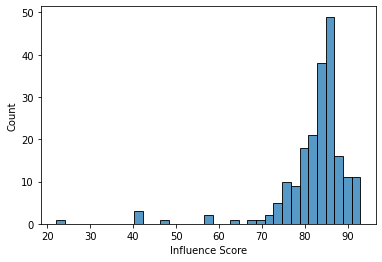

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Influence Score'])

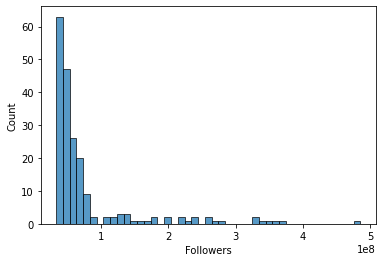

In [16]:
sns.histplot(df['Followers'])

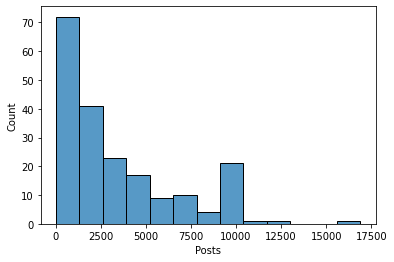

In [17]:
sns.histplot(df['Posts'])

3. Which country houses the highest number of Instagram Influencers? Please show the
count of Instagram influencers in different countries using barchart.

In [18]:
df['Country Or Region'].unique()

array(['Spain', 'United States', 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [19]:
count=df['Country Or Region'].value_counts()

<BarContainer object of 25 artists>

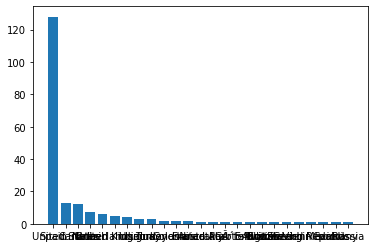

In [20]:
plt.bar(df['Country Or Region'].unique(),df['Country Or Region'].value_counts())

4. Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

In [64]:
df.groupby('Followers')['Channel Info'].sum().tail(10)

Followers
260000000.0       \njustinbieber
273900000.0    \nkhloekardashian
276100000.0            \nbeyonce
330700000.0      \nkimkardashian
333000000.0       \narianagrande
339400000.0            \ntherock
348800000.0        \nselenagomez
363900000.0           \nleomessi
370700000.0          kyliejenner
485200000.0          \ncristiano
Name: Channel Info, dtype: object

In [56]:
df.groupby('Avg. Likes')['Channel Info'].sum().tail(10)

Avg. Likes
5900000.0          \nzendaya
6000000.0     \nlalalalisa_m
6100000.0      \nselenagomez
6700000.0         \nleomessi
8200000.0        kyliejenner
8400000.0     \nbillieeilish
8700000.0        \ncristiano
10600000.0           \nrkive
14400000.0             \nj.m
15400000.0             \nthv
Name: Channel Info, dtype: object

In [57]:
df.groupby('Total Likes')['Channel Info'].sum().tail(10)

Total Likes
1.260000e+10          \ntherock
1.290000e+10       \nnickiminaj
1.400000e+10     \njustinbieber
1.440000e+10         \nneymarjr
1.800000e+10       \nbadgalriri
1.850000e+10     \narianagrande
1.980000e+10    \nkimkardashian
2.080000e+10          \nzendaya
2.910000e+10        \ncristiano
5.740000e+10        kyliejenner
Name: Channel Info, dtype: object

5. Describe the relationship between the following pairs of features using a suitable graph

● Followers and Total Likes

● Followers and Influence Score

● Posts and Average likes

● Posts and Influence Score

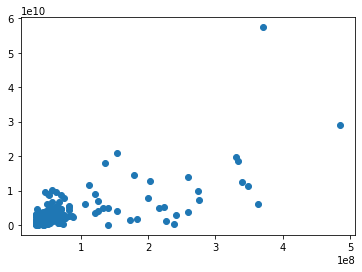

In [68]:
plt.scatter(df['Followers'],df['Total Likes'])

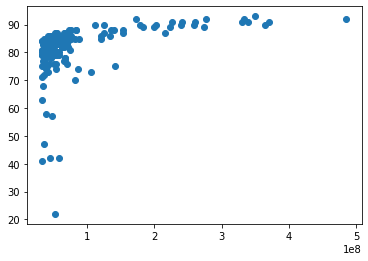

In [69]:
plt.scatter(df['Followers'],df['Influence Score'])

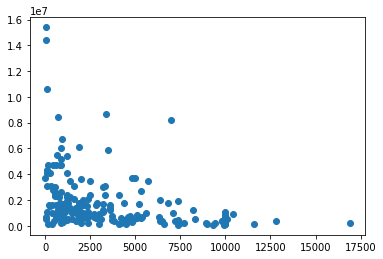

In [72]:
plt.scatter(df['Posts'],df['Avg. Likes'])

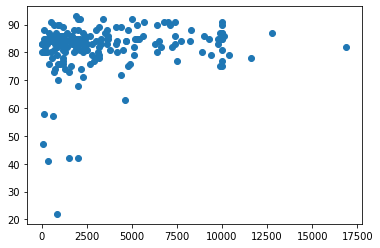

In [73]:
plt.scatter(df['Posts'],df['Influence Score'])